In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#### For the "Median value of owner-occupied homes" provide a **boxplot**

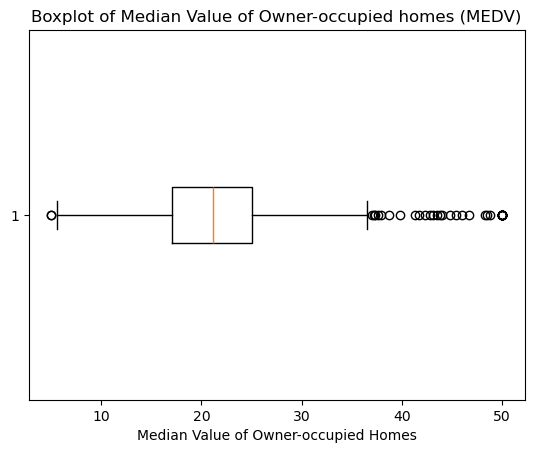

In [3]:
plt.boxplot(boston_df['MEDV'], vert=False)
plt.xlabel('Median Value of Owner-occupied Homes')
plt.title('Boxplot of Median Value of Owner-occupied homes (MEDV)')
plt.show()

#### Provide a  **bar plot** for the Charles river variable

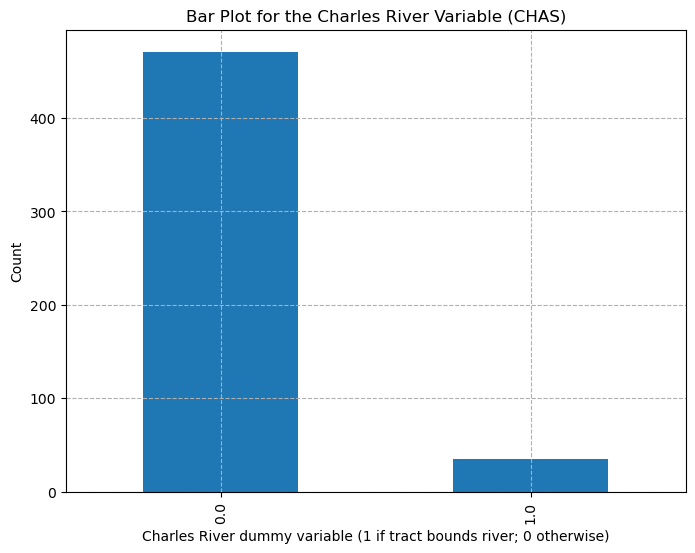

In [4]:
plt.figure(figsize=(8,6))
boston_df['CHAS'].value_counts().plot(kind = 'bar') # count the occurrences of 1's and 0's in the "Charles River" (CHAS) column using boston_df['CHAS'].value_counts(), which gives us a count of how many times each value appears.
plt.title('Bar Plot for the Charles River Variable (CHAS)')
plt.xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.grid(linestyle='--')
plt.show()

##### Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

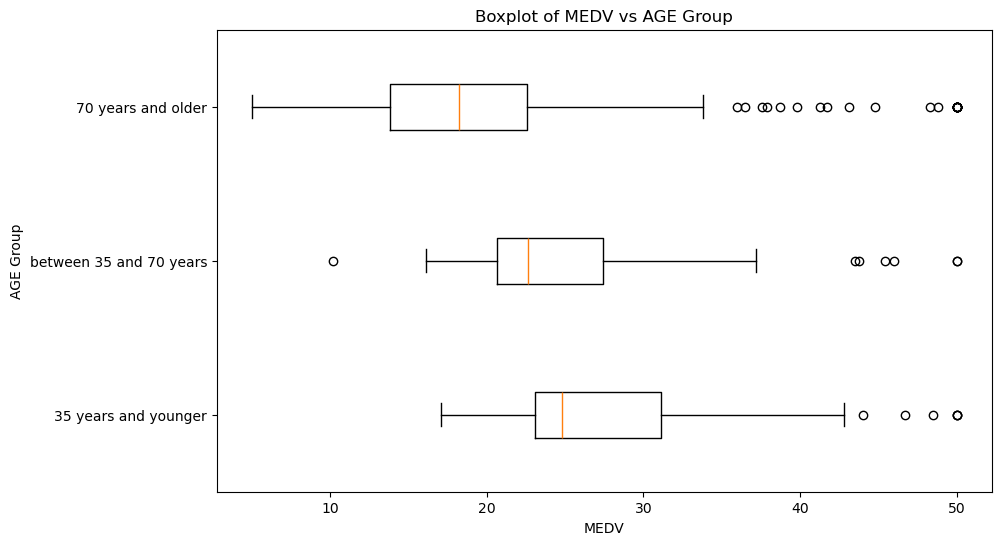

In [5]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, float('inf')]  # Define the age group bins (0-35, 35-70, 70+)
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']  # Labels for the age groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)  # Create a new 'AGE_Group' column

# Create a boxplot for MEDV vs AGE_Group
plt.figure(figsize=(10, 6))  # Create a figure with a specified size
# Use list comprehension to extract MEDV values for each AGE_Group category and create a boxplot
plt.boxplot([boston_df[boston_df['AGE_Group'] == group]['MEDV'] for group in labels], vert=False, labels=labels)
plt.title('Boxplot of MEDV vs AGE Group')  # Set the plot title
plt.xlabel('MEDV')  # Label for the x-axis
plt.ylabel('AGE Group')  # Label for the y-axis
plt.show()  # Display the boxplot


##### Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

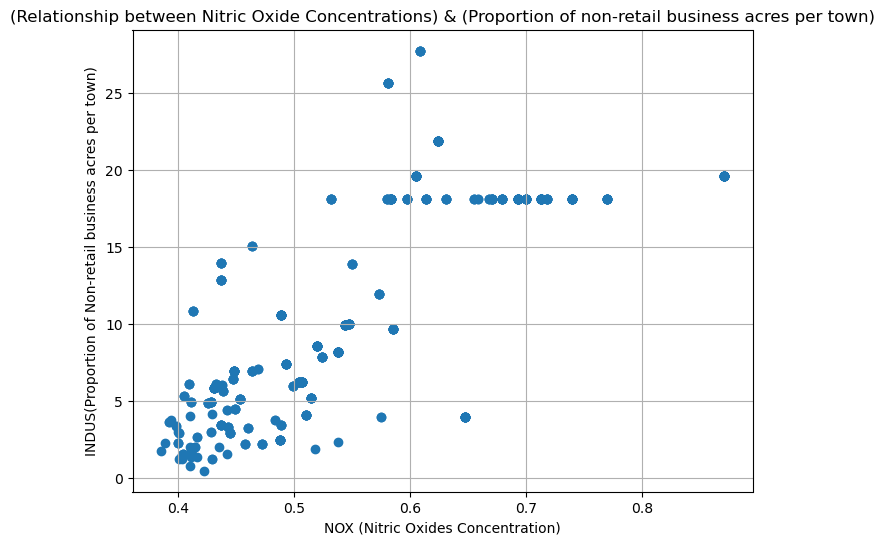

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x=boston_df['NOX'], y=boston_df['INDUS'], alpha=1) # alpha=0.5 parameter makes the points slightly transparent for better visualization
plt.title('(Relationship between Nitric Oxide Concentrations) & (Proportion of non-retail business acres per town)')
plt.xlabel('NOX (Nitric Oxides Concentration)')
plt.ylabel('INDUS(Proportion of Non-retail business acres per town)')
plt.grid(True) # Enable grid lines for reference
plt.show()

The scatter plot suggests a **positive** relationship between NOX & INDUS. Still, the relationship may be more complex, and other factors may influence nitric oxide concentrations and the proportion of non-retail business acres.

Create a **histogram** for the pupil to teacher ratio variable

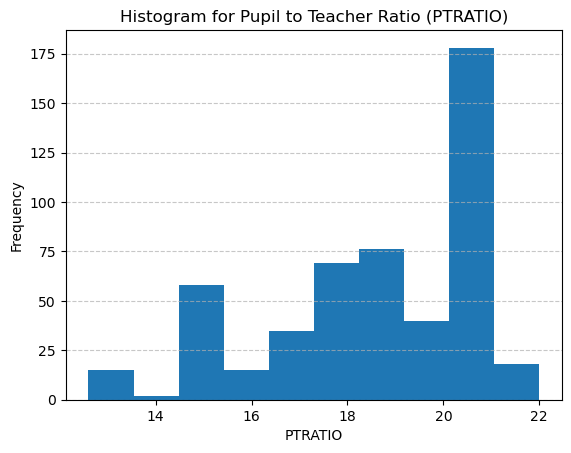

In [7]:
plt.hist(boston_df['PTRATIO'])
plt.title('Histogram for Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [8]:
# Define two groups based on CHAS: 1 (bounded) and 0 (not bounded)
chas_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the t-test for independent samples
t_statistic, p_value = stats.ttest_ind(chas_bounded, chas_not_bounded)

# Print the results
print(f'Test Statistic (t): {t_statistic}')
print(f'P-value: {p_value}')

# Compare the p-value to the significance level (α)
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis (H0). There is a significant difference in median values.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). There is no significant difference in median values.")

Test Statistic (t): 3.996437466090509
P-value: 7.390623170519902e-05
Conclusion: Reject the null hypothesis (H0). There is a significant difference in median values.


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [9]:
# Separate the data into three age groups
age_group1 = boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV']
age_group2 = boston_df[boston_df['AGE_Group'] == 'between 35 and 70 years']['MEDV']
age_group3 = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']

# Perform the ANOVA
f_statistic, p_value = stats.f_oneway(age_group1, age_group2, age_group3)

# Print the results
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Compare the p-value to the significance level (α)
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis (H0). There is a significant difference in median values among age groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). There is no significant difference in median values among age groups.")


F-Statistic: 36.40764999196599
P-Value: 1.7105011022702984e-15
Conclusion: Reject the null hypothesis (H0). There is a significant difference in median values among age groups.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [10]:
# Perform the Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

# Compare the p-value to the significance level (α)
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis (H0). There is a significant linear relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). There is no significant linear relationship between NOX and INDUS.")


Pearson Correlation Coefficient: 0.7636514469209152
P-Value: 7.91336106123953e-98
Conclusion: Reject the null hypothesis (H0). There is a significant linear relationship between NOX and INDUS.


#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [11]:
# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit a simple linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
summary = model.summary()

# Extract the p-value for the DIS coefficient
p_value = model.pvalues['DIS']

# Print the regression summary
print(summary)

# Compare the p-value to the significance level (α)
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis (H0). There is a significant linear relationship between DIS and MEDV.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). There is no significant linear relationship between DIS and MEDV.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        22:25:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0